<a href="https://colab.research.google.com/github/prof-eduardo-galego/fiap-bpm-ia/blob/main/modulo_I_aprendizado_supervisionado_arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo I - Aprendizado Supervisionado - Árvore de Decisão

Neste notebook apresentamos o algoritmo para construção de uma árvore de decisão. Este exemplo foi adaptado de https://scikit-learn.org/stable/modules/tree.html.

## Biblioteca e Módulos

Vamos utilizar a bilioteca __Scikit Learn__ para este exemplo. Segue código para carregá-la com os módulos que utilizaremos ao longo do notebook:

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Dados

Vamos utilizar um conjunto de dados mais complexo (considera um clássico na área de Aprendizagem de Máquina). Este contém dados de flores: a largura e comprimento das pétalas e sépalas de flores chamadas __Iris__. Objetivo aqui é classificar as flores nos tipos: Iris Setosa (0), Iris Versicolour (1) e Iris Virginica (2). 

Segue o código para importar o DataSet:

In [20]:
iris = load_iris()
print(iris)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) # 70% training and 30% test


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Construção da Árvore de Decisão

Vamos utilizar a classe `DecisionTreeClassifier` da biblioteca Scikit Learn para construção do nosso modelo. Segue o código:

In [11]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree = decision_tree.fit(X_train, y_train)

## Apresentação

Podemos apresentar a árvore de decisão por texto ou por meio de um grafo. Segue o código:

In [12]:
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 5.00
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.00
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

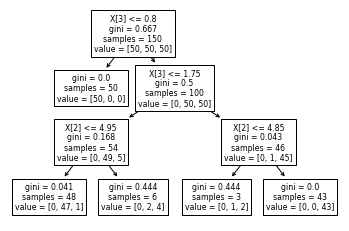

In [5]:
tree.plot_tree(decision_tree)

## Valiação do Modelo

Podemos utilizar o conjunto de dados de teste para verificar a performance do nosso modelo. Segue o código:

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(X_train)
print(y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.  3.4 4.5 1.6]
 [7.7 2.8 6.7 2. ]
 [5.7 3.  4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.  1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 2.9 4.3 1.3]
 [6.5 3.  5.5 1.8]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 6.  2.5]
 [5.5 2.5 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 4.1 1.5 0.1]
 [6.7 3.3 5.7 2.1]
 [4.4 3.  1.3 0.2]
 [6.  2.7 5.1 1.6]
 [6.4 2.7 5.3 1.9]
 [5.9 3.  5.1 1.8]
 [5.2 3.5 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.8 2.7 4.1 1. ]
 [4.9 3.1 1.5 0.1]
 [7.4 2.8 6.1 1.9]
 [6.2 2.9 4.3 1.3]
 [7.6 3.  6.6 2.1]
 [6.7 3.  5.2 2.3]
 [6.3 2.3 4.4 1.3]
 [6.2 3.4 5.